### Importación de datos



In [1]:
import pandas as pd

!pip install matplotlib==3.8.1
import matplotlib.pyplot as plt

paleta_de_colores = ["#fbf8cc","#fde4cf","#ffcfd2","#f1c0e8","#cfbaf0","#a3c4f3","#90dbf4","#8eecf5","#98f5e1","#b9fbc0"]

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación



In [2]:
tiendas=[tienda1,tienda2,tienda3,tienda4]

In [3]:
# Creo una función que reciba como parámetro una tienda, y me devuelva su ingreso total
def ingresosTotales(tienda):
    '''Función que recibe por argumento una tienda y retorna la suma de sus ingresos correspondientes a "Precio"

    Args:
        pandas.core.frame.DataFrame

    Returns:
        suma de los valores correspondientes a "Precio" de la tienda

    '''
    return sum(tienda['Precio'])

In [4]:
print("Tienda 1: ", ingresosTotales(tienda1))
print("Tienda 2: ", ingresosTotales(tienda2))
print("Tienda 3: ", ingresosTotales(tienda3))
print("Tienda 4: ", ingresosTotales(tienda4))

Tienda 1:  1150880400.0
Tienda 2:  1116343500.0
Tienda 3:  1098019600.0
Tienda 4:  1038375700.0


In [5]:
# creo una función que reciba una lista de tiendas y grafique las ventas totales por tienda
def graficarIngresosTotales(tiendas):
    '''Función que recibe una lista de tiendas, y genera un gráfico en base a sus ingresos totales. También imprime en pantalla la tienda con menor y mayor ingresos
    
    Arg:
        lista de tiendas
    
    Outputs:
        gráfico de barras con ingresos totales por tienda

    '''
    # lista que almacenará los ingresos totales
    valores = []
    # itero sobre la lista de tiendas
    for tienda in tiendas:
        # agrego el ingreso total de la tienda a la lista valores
        valores.append(ingresosTotales(tienda))

    # defino x que será el eje del gráfico con los nombres de las tiendas
    x = ['Tienda'+str(i+1) for i in range(len(tiendas))]

    plt.bar(x,valores, width=.5,color=paleta_de_colores)
    plt.show()

    # tienda con mayores ingresos
    

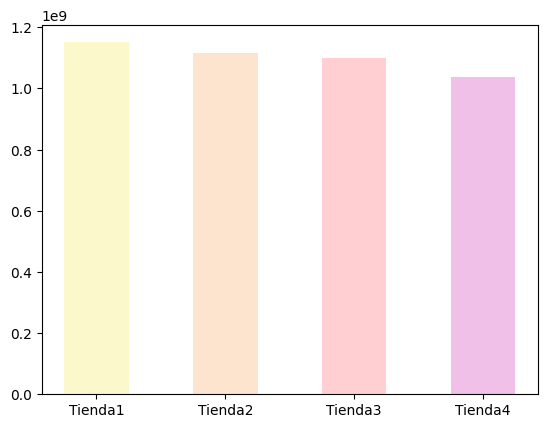

In [6]:
graficarIngresosTotales(tiendas)

Categorías más vendidas
	Juguetes: 324
	Electrónicos: 448
	Muebles: 465

Categorías menos vendidas:
	Artículos para el hogar: 171


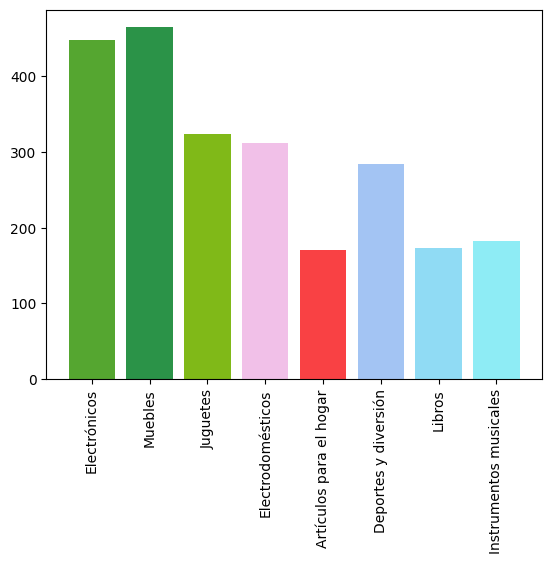

In [7]:
def ventasPorCategoria (tienda):
    '''Función que lee una tienda, y devuelve dos listas, una con los nombres de las categorías y otra con lo valores de venta por categoría

    args:
        lista de tiendas

    outputs:
        gráfico de barras con ventas por categoría

    return:
        lista[categorias,cantidades]

    '''
    
    # iniciaremos una lista llamada "productosCategorias" para almacenar la categoría de cada producto vendido

    productosCategorias = list(tienda['Categoría del Producto'])
    
    # creamos una lista donde se almacenaran los valores de los nombres de las categorías
    categorias = []

    # creamos una lista llamada 'valores' donde se almacenaran la cantidad de productos vendidos por categoría

    valores = []

    # iteramos sobre la lista total de categorías por producto

    for i in productosCategorias:
        # si la categoría aún no se añadió a nuestra lista de nombre de categorias

        if i not in categorias:

            # agregaremos esa categoría a la lista
            categorias.append(i)

            # definimos la variable valor como contador por cada vez que aparezca la categoría entre los productos
            valor = 0

            # iteramos sobre la lista total de productos para comparar
            for elemento in productosCategorias:
                # si el elemento es igual a la categoría sobre la que se está iterando
                if elemento == i:
                    # sumaremos uno al contador
                    valor += 1
                # agregamos el contador obtenido a la lista valores
            valores.append(valor)

    # para saber los 3 productos más vendidos y el menos vendido
    # creamos una nueva lista para tener los valores ordenados
    valoresOrdenados = list(valores)
    valoresOrdenados.sort()

    # a su vez vamos a modificar los colores de la paleta para resaltar los más y menos vendidos
    colores = list(paleta_de_colores)
    modColores = [ '#f94144','#80b918','#55a630', '#2b9348']

    print("Categorías más vendidas")
    for i in range(-3,1):
        if i == 0:
            print('\nCategorías menos vendidas:')
        indice = valores.index(valoresOrdenados[i])
        colores[indice]=modColores[i]
        print(f'\t{categorias[indice]}: {valores[indice]}') 

    # para graficar
    plt.bar(categorias, valores, color= colores)
    
    # damos inclinación a las etiquetas del eje x debido a que son muchas y se superponen
    plt.xticks(rotation=90)

    # mostramos el gráfico
    plt.show()

ventasPorCategoria(tienda1)

In [8]:
tienda1['Calificación']

0       4
1       1
2       1
3       4
4       5
       ..
2354    1
2355    5
2356    5
2357    1
2358    4
Name: Calificación, Length: 2359, dtype: int64

In [12]:
list(tienda1['Producto'])

['Asistente virtual',
 'Mesa de comedor',
 'Juego de mesa',
 'Microondas',
 'Silla de oficina',
 'Bloques de construcción',
 'Muñeca bebé',
 'Lavavajillas',
 'Lavadora de ropa',
 'Carrito de control remoto',
 'Refrigerador',
 'Lavavajillas',
 'Auriculares',
 'Olla de presión',
 'Bicicleta',
 'Ciencia de datos con Python',
 'Balón de voleibol',
 'Ajedrez de madera',
 'TV LED UHD 4K',
 'Juego de mesa',
 'Microondas',
 'Vaso térmico',
 'Bicicleta',
 'Kit de bancas',
 'Dashboards con Power BI',
 'Cubertería',
 'Set de ollas',
 'Batería',
 'Cuerda para saltar',
 'Carrito de control remoto',
 'Estufa',
 'Juego de mesa',
 'Cama box',
 'Vaso térmico',
 'Bloques de construcción',
 'Vaso térmico',
 'Impresora',
 'Mesa de noche',
 'Dashboards con Power BI',
 'Cama box',
 'Auriculares',
 'Armario',
 'Dinosaurio Rex',
 'Microondas',
 'Juego de mesa',
 'Bicicleta',
 'Guitarra eléctrica',
 'Set de ollas',
 'Secadora de ropa',
 'Sofá reclinable',
 'Tablet ABXY',
 'Kit de bancas',
 'Impresora',
 'Bater

In [19]:
productos = []
for tienda in tiendas:
    for producto in tienda['Producto']:
        if producto not in productos:
            productos.append(producto)
productos.sort()
cantidades = [ [0 for i in range(len(productos))] for j in range(len(tiendas))]


In [20]:
cantidades

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

In [25]:
for t in range(len(tiendas)):
    for producto in tiendas[t]['Producto']:
        if producto in productos:
            cantidades[t][productos.index(producto)]+=1

In [26]:
productos

['Ajedrez de madera',
 'Armario',
 'Asistente virtual',
 'Auriculares',
 'Auriculares con micrófono',
 'Balón de baloncesto',
 'Balón de voleibol',
 'Batería',
 'Bicicleta',
 'Bloques de construcción',
 'Cama box',
 'Cama king',
 'Carrito de control remoto',
 'Celular ABXY',
 'Ciencia de datos con Python',
 'Cubertería',
 'Cubo mágico 8x8',
 'Cuerda para saltar',
 'Dashboards con Power BI',
 'Dinosaurio Rex',
 'Estufa',
 'Guitarra acústica',
 'Guitarra eléctrica',
 'Impresora',
 'Iniciando en programación',
 'Iphone 15',
 'Juego de mesa',
 'Kit de bancas',
 'Lavadora de ropa',
 'Lavavajillas',
 'Mesa de centro',
 'Mesa de comedor',
 'Mesa de noche',
 'Microondas',
 'Mochila',
 'Modelado predictivo',
 'Muñeca bebé',
 'Olla de presión',
 'Pandereta',
 'Refrigerador',
 'Secadora de ropa',
 'Set de ollas',
 'Set de vasos',
 'Silla de oficina',
 'Sillón',
 'Smart TV',
 'Smartwatch',
 'Sofá reclinable',
 'TV LED UHD 4K',
 'Tablet ABXY',
 'Vaso térmico']

In [27]:
cantidades[0]==cantidades[1]

False

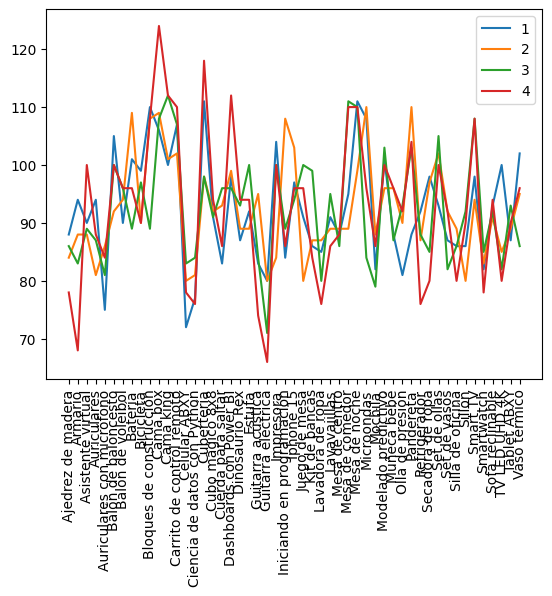

In [28]:
plt.plot(productos,cantidades[0])
plt.plot(productos,cantidades[1])
plt.plot(productos,cantidades[2])
plt.plot(productos,cantidades[3])
plt.xticks(rotation=90)
plt.legend(['1','2','3','4'])